In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# generate numpy array from correlation matrix text file produced by run_30_pp_roi.tcsh
matrix_pre = np.genfromtxt('sub-Linus_predrug_no_smoothing.netcc', skip_header=6)
matrix_post = np.genfromtxt('sub-Linus_postdrug_no_smoothing.netcc', skip_header=6)
#print(matrix_3mm)

In [3]:
for i in range(len(matrix_post)):
    matrix_post[i,i] = np.nan
    matrix_pre[i,i] = np.nan

In [4]:
# set slicing variable to seperate the correlation matrix into desired categories:
# CL_CL: correlation within left hemisphere
# CR_CR: correlation within right hemisphere
# CL_CR: correlation across left and right hemisphere
# CL_CL: correlation across right and left hemisphere
# pre: predrug, post: postdrug

slicer = int(len(matrix_pre)/2)

CL_CL_matrix_pre = matrix_pre[:slicer,:slicer]
#print(CL_CL_matrix)
CR_CR_matrix_pre = matrix_pre[slicer:,slicer:]
#print(CR_CR_matrix)
CL_CR_matrix_pre = matrix_pre[:slicer,slicer:]
#CL_CR_matrix
CR_CL_matrix_pre = matrix_pre[slicer:,:slicer]
#CR_CL_matrix

CL_CL_matrix_post = matrix_post[:slicer,:slicer]

CR_CR_matrix_post = matrix_post[slicer:,slicer:]

CL_CR_matrix_post = matrix_post[:slicer,slicer:]

CR_CL_matrix_post = matrix_post[slicer:,:slicer]

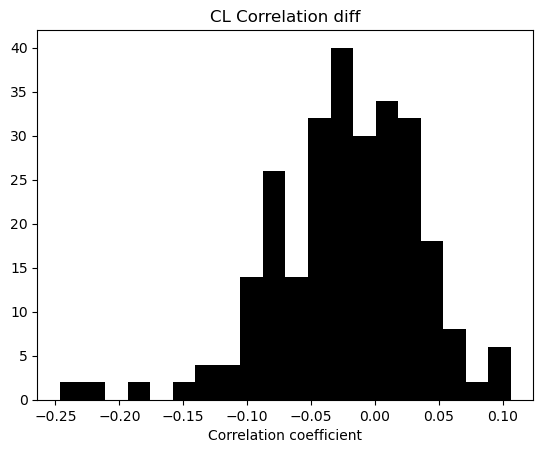

In [5]:
# plotting CL_CL correlations in histogram
CL_CL_diff = CL_CL_matrix_post- CL_CL_matrix_pre

plt.hist(np.ravel(CL_CL_diff), bins=20, color = 'black');
plt.title('CL Correlation diff');
plt.xlabel('Correlation coefficient');
plt.savefig('CL_corr', format='svg')

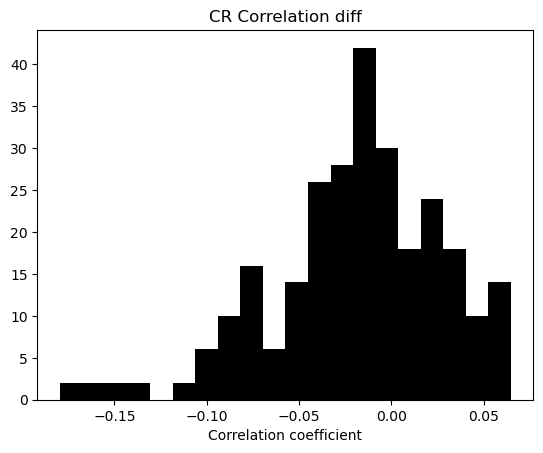

In [6]:
# plotting CR_CR correlations in histogram
CR_CR_diff = CR_CR_matrix_post -CR_CR_matrix_pre

plt.hist(np.ravel(CR_CR_diff), bins=20, color = 'black');
plt.title('CR Correlation diff');
plt.xlabel('Correlation coefficient');
plt.savefig('CR_corr', format='svg')

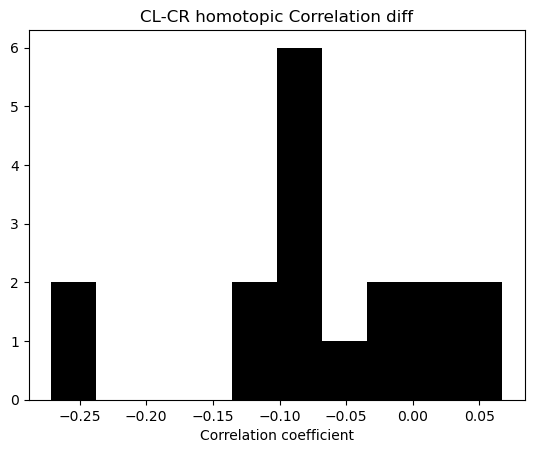

In [7]:
# plotting correlations of homotopic pairs in histogram
CL_CR_diff = CL_CR_matrix_post - CL_CR_matrix_pre
matrix_diff = matrix_post - matrix_pre

homotopic_array = np.zeros(slicer)

for i in range(slicer):
    homotopic_array[i] = matrix_diff[i, slicer+i]
    
plt.hist(homotopic_array, bins=10, color='black');
plt.title('CL-CR homotopic Correlation diff');
plt.xlabel('Correlation coefficient');
plt.savefig('CL_CR_corr_homotopic', format='svg')

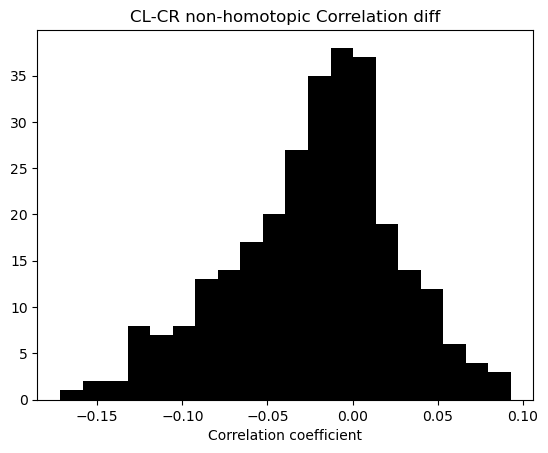

In [8]:
# plotting CL_CR non_homotopic correlations in histogram
non_homotopic_array = np.ma.array(CL_CR_diff, mask=False) 
#print(np.sum(non_homotopic_array))

for i in range(slicer):
    non_homotopic_array.mask[i, i] = True
    #print(np.sum(non_homotopic_array))

plt.hist(np.ravel(non_homotopic_array), bins=20, color = 'black');
plt.title('CL-CR non-homotopic Correlation diff');
plt.xlabel('Correlation coefficient');
plt.savefig('CL_CR_corr_nonhomotopic', format='svg')

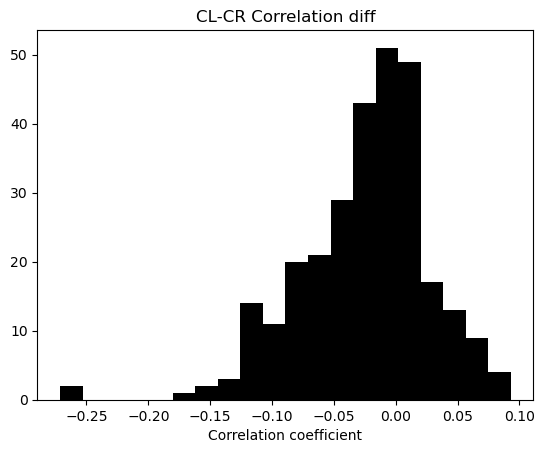

In [9]:
# plotting all CL_CR correlations in histogram 
plt.hist(np.ravel(CL_CR_diff), bins=20, color = 'black');
plt.title('CL-CR Correlation diff');
plt.xlabel('Correlation coefficient');
plt.savefig('CL_CR_corr', format='svg')